**Importing Packages and libraries**

In [327]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns       
import warnings

warnings.filterwarnings("ignore")


**Importing Data**

In [328]:
marketing = pd.read_csv("data\marketing_data.csv")
marketing.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [329]:
print(marketing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Data Overview & Initial Observations**

- Dataset Summary:

    - Total Entries: 2,240

    - Total Columns: 28

- Data Types:

    - int64: 23 columns

    - object: 5 columns

- Data Cleaning Notes:
    - The Income column name contains leading spaces, which can lead to unexpected behavior during data manipulation.
    - Fix: Rename this column by removing whitespace.
    - The income column appears to have some missing values 

- Best practice: ensure all column names are free of spaces and consistently formatted (e.g., use underscores _ or camelCase).

**Data Cleaning**


cleaning the column names and contents  

In [330]:
marketing[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [331]:
marketing.columns = marketing.columns.str.strip()

In [332]:
marketing['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [333]:
marketing['Income'] = marketing['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)


In [334]:
marketing.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [335]:
marketing['Dt_Customer']

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

datatype issues

In [336]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%m/%d/%y')
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Data Type Cleaning Summary**

The dataset has been successfully cleaned with the following updates:

- Whitespace Issues:

    - Leading/trailing spaces in column names (e.g., " Income") were removed.

- Income Column:

    - Converted from object (e.g., "$84,835.00") to float64 by stripping currency symbols and commas.

- Dt_Customer Column:

    - Converted from object to datetime64[ns] using the format '%m/%d/%y', enabling time-based operations.

- Current Data Type Overview:

    - Numerical Columns: 23 (int64 and float64)

    - Datetime Columns: 1 (Dt_Customer)

    - Categorical Columns: 3 (Education, Marital_Status, Country)

In [337]:
print(marketing['Education'].value_counts())
print("\n")
print(marketing['Marital_Status'].value_counts())


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


**Missing values check**

In [338]:
marketing['Education'] = marketing['Education'].replace({
    '2n Cycle': 'Master'
})

marketing['Marital_Status'] = marketing['Marital_Status'].replace({
    'Alone': 'Single',
    'Together'    : 'Married',
    
    
})

marketing = marketing[~marketing['Marital_Status'].isin(['YOLO', 'Absurd'])]




**Missing values check**

In [339]:
marketing.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

The **income column** contains missing values that cannot be ignored. These values will be imputed using either the mean or the median. However, before deciding which method to use, the distribution of the income data will be visualized using both a histogram and a box plot.

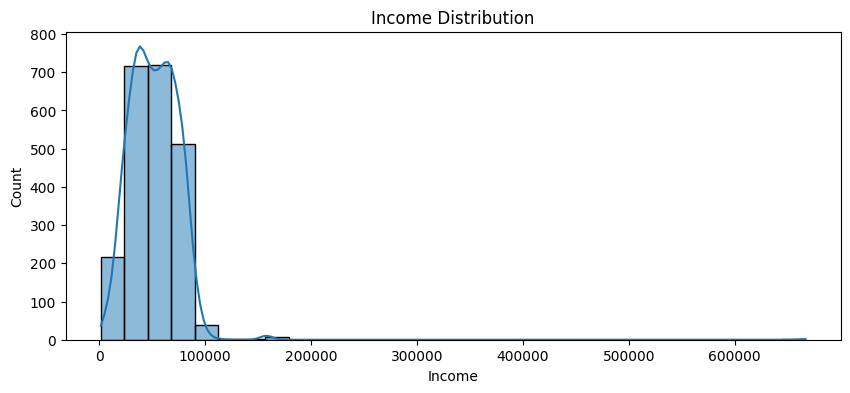

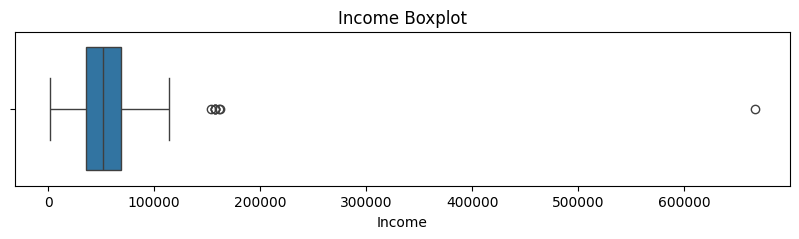

In [340]:

plt.figure(figsize=(10, 4))
sns.histplot(marketing['Income'], bins=30, kde=True)
plt.title("Income Distribution")

plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=marketing['Income'])
plt.title("Income Boxplot")
plt.show()


The distribution plot resembles a superposition of two normal curves, suggesting a bimodal distribution — possibly due to two distinct customer segments or income groups. The boxplot clearly shows several outliers, including an extreme one above $600,000, which would skew the mean upwards. Therefore, median imputation is more appropriate, as the median is less sensitive to outliers.

Before proceeding, the extrem outlier above $600 000 will be removed, it is likely skewing the summary statistics. 

The remaining ouliers still skew the distribution, the tail is slightley up and will have to be dealt with.

In [341]:
display(marketing[marketing['Income'] > 125000])
print(marketing['Education'].value_counts())
print("\n")
print(marketing['Marital_Status'].value_counts())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
325,4931,1977,Graduation,Married,157146.0,0,0,2013-04-29,13,1,...,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Married,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Married,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Married,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,CA
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND


Education
Graduation    1126
Master         572
PhD            484
Basic           54
Name: count, dtype: int64


Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Name: count, dtype: int64


**Outlier Analysis Summary**

The first table displays the 7 high-income outlier records, with the following key characteristics:

- Marital Status: 6 are married, and 1 is divorced.

- Education: 4 hold PhDs, 1 has a Master’s degree, and 2 are Graduates.

Interpretation

- While these records may represent legitimate high earners (e.g., CEOs or executives in large firms), their extreme incomes skew the dataset’s statistics. Given that:

    - Only 0.3% of the total dataset (7 out of 2,240 records) are affected,

    - The education distribution remains practically unchanged (only 0.8% of PhDs, 0.2% of Masters, and 0.2% of Graduates are removed),

Action Plan

Removing these outliers is justified because:

- Minimal Impact: The dataset retains 475 PhDs, 563 Masters, and 1,112 Graduates—still statistically representative.

- Statistical Integrity: Their presence distorts income-based analysis (e.g., mean vs. median comparisons).


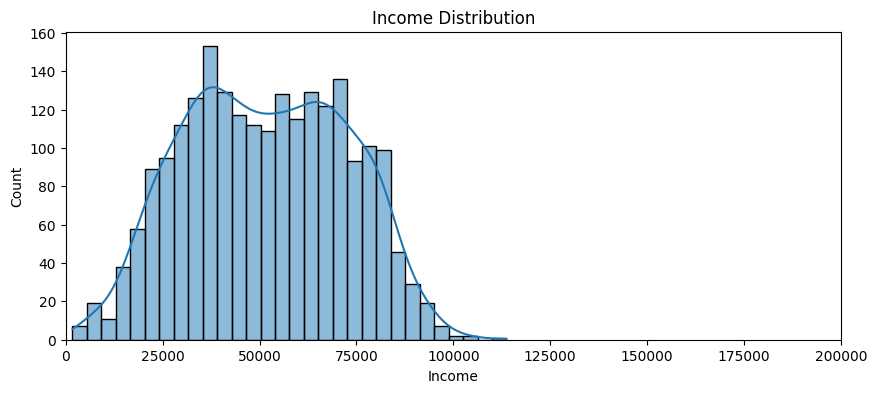

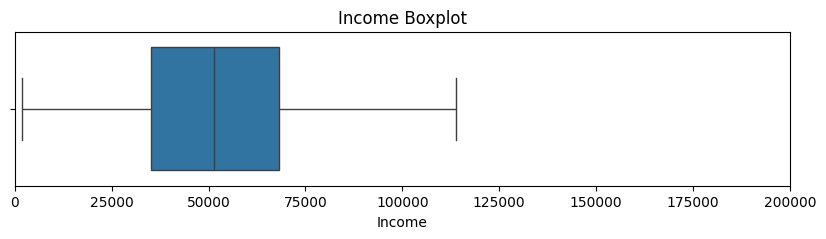

In [342]:
marketing = marketing[marketing['Income'] < 150000]


marketing['Income'].mean() 


plt.figure(figsize=(10, 4))
sns.histplot(marketing['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlim(0, 200000)

plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=marketing['Income'])
plt.title("Income Boxplot")
plt.xlim(0, 200000)
plt.show()


In [343]:
marketing['Income'].mean()

np.float64(51617.73049001815)

In [344]:
marketing['Income'].median()

np.float64(51301.0)

In [347]:
group_median = marketing.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
marketing['Income'] = marketing['Income'].fillna(group_median)


In [ ]:
marketing['Income'].isna().sum()  # Check if there are any missing values left in the 'Income' column

np.int64(0)